**Recurrent neural network (RNN) Use the Google stock prices dataset and design a time 
series analysis and prediction system using RNN.**

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
df = pd.read_csv('datasets/GOOGL.csv')

In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [9]:
data = np.array(df['Close']).reshape(-1, 1)

In [10]:
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data)

In [11]:
train_size = int(len(data_scaled) * 0.8)
train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]

In [12]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [13]:
seq_length = 10
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [14]:
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(units=50),
    Dense(units=1)
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [17]:
model.fit(X_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
56/56 [==============================] - 6s 14ms/step - loss: 0.0024
Epoch 2/10
56/56 [==============================] - 1s 13ms/step - loss: 3.5920e-05
Epoch 3/10
56/56 [==============================] - 1s 14ms/step - loss: 3.2947e-05
Epoch 4/10
56/56 [==============================] - 1s 12ms/step - loss: 3.3707e-05
Epoch 5/10
56/56 [==============================] - 1s 12ms/step - loss: 3.2590e-05
Epoch 6/10
56/56 [==============================] - 1s 13ms/step - loss: 3.0905e-05
Epoch 7/10
56/56 [==============================] - 1s 15ms/step - loss: 3.3465e-05
Epoch 8/10
56/56 [==============================] - 1s 15ms/step - loss: 3.3384e-05
Epoch 9/10
56/56 [==============================] - 1s 15ms/step - loss: 3.2274e-05
Epoch 10/10
56/56 [==============================] - 1s 15ms/step - loss: 3.0465e-05


In [22]:
y_pred = model.predict(X_test)

28/28 [==============================] - 0s 7ms/step


In [23]:
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R-squared Score: {r2_score(y_test, y_pred)}')

Mean Squared Error: 0.0005928227834391096
R-squared Score: 0.9873628456826238


In [24]:
y_test_actual = scaler.inverse_transform(y_test)
y_pred_actual = scaler.inverse_transform(y_pred)

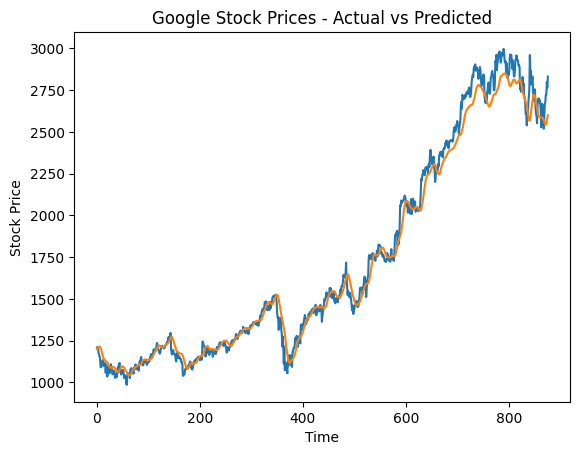

In [30]:
plt.plot(y_test_actual, label='Actual')
plt.plot(y_pred_actual, label='Predicted')
plt.title('Google Stock Prices - Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()

In [32]:
print("Predicted Price:", y_pred[0][0])
print("Actual Price:", y_test[0][0])

Predicted Price: 0.3902197
Actual Price: 0.3931411719038997
